In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data.astype('float64'), mnist.target.astype('int64')


/opt/homebrew/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X, y = mnist.data.astype('float64'), mnist.target.astype('int64')

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

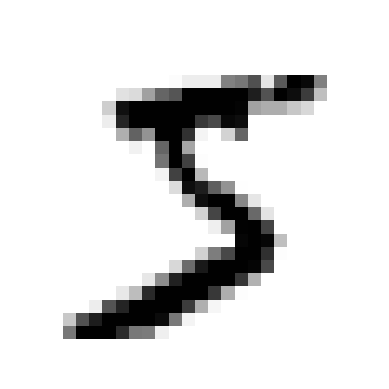

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[0].values
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [7]:
y[0]

5

In [8]:
import numpy as np

y = y.astype(np.uint8)

Always create a test set and set it aside before inspecting the data

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test ==5)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train_5)

KNeighborsClassifier(n_neighbors=3)

In [12]:
predictions = knn_clf.predict(X_train)

In [13]:
predictions

array([ True, False, False, ...,  True, False, False])

In [14]:
knn_clf.predict([some_digit])

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [15]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy')

In [16]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [17]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [18]:
accuracy = best_model.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Best Model Accuracy on Test Set:", accuracy)

Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best Model Accuracy on Test Set: 0.9717


97% accuracy model

In [24]:
def shift_image(image, direction):
    # Convert the image from string to numerical values
    image = np.array(list(map(int, image)))
    
    # Reshape the image to 28x28 (assuming MNIST image size)
    reshaped_image = image.reshape((28, 28))
    
    # Define shift amounts based on the direction
    if direction == 'left':
        shift_amounts = [-1, 0]
    elif direction == 'right':
        shift_amounts = [1, 0]
    elif direction == 'up':
        shift_amounts = [0, -1]
    elif direction == 'down':
        shift_amounts = [0, 1]
    else:
        raise ValueError("Invalid direction. Use 'left', 'right', 'up', or 'down'")
    
    # Shift the image
    shifted_image = shift(reshaped_image, shift_amounts, cval=0)
    
    # Flatten the shifted image back to 1D
    flattened_image = shifted_image.flatten()
    
    return flattened_image

In [25]:
# Create shifted copies and expand the training set
directions = ['left', 'right', 'up', 'down']

X_expanded_train = []
y_expanded_train = []

for direction in directions:
    for image, label in zip(X_train.values, y_train):
        shifted_image = shift_image(image, direction)
        X_expanded_train.append(shifted_image)
        y_expanded_train.append(label)

X_expanded_train = np.array(X_expanded_train)
y_expanded_train = np.array(y_expanded_train)

In [26]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_expanded_train, y_expanded_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on Test Set:", accuracy)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
